# Plotting with Matplotlib + Seaborn 📊

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 

# Allows jupyter to display plots inside notebooks
%matplotlib inline

# This will make Jupyter display the plots as vector graphics
%config InlineBackend.figure_format = 'svg' 

## Wide and narrow data
(From Wikipedia, the free encyclopedia)
  
Wide and narrow (sometimes un-stacked and stacked, or wide and tall) are terms used to describe two different presentations for tabular data.

### Wide data
Wide, or unstacked data is presented with each different data variable in a separate column. A matrix of values can be considered a wide table:

In [2]:
data = pd.DataFrame(np.random.random((5, 5)))
data

,0,1,2,3,4
0,0.364660,0.223232,0.732303,0.099268,0.460039
1,0.508359,0.945295,0.920578,0.235254,0.886704
2,0.708485,0.656988,0.803279,0.715532,0.408300
3,0.673965,0.388214,0.972539,0.322195,0.806726
4,0.586298,0.681654,0.718190,0.451795,0.997594


### Narrow data
See also: Entity–attribute–value mode. 

Narrow, [Note: in python usually called long], or stacked data is presented with one column containing all the values and another column listing the context of the value. This is often easier to implement; addition of a new field does not require any changes to the structure of the table, however it can be harder for people to understand.  
  
To plot data in Python using Matplotlib and Seaborn, data needs to be in long format.

In [3]:
# Convert wide table to long table. Note: DataFrame.reset_index() creates a new column from the tables row indes.

data_long = data.reset_index().melt(id_vars="index")
data_long.head()

,index,variable,value
0,0,0,0.364660
1,1,0,0.508359
2,2,0,0.708485
3,3,0,0.673965
4,4,0,0.586298


### Plotting data  
Example data used for plotting: The Iris dataset: https://en.wikipedia.org/wiki/Iris_flower_data_set

In [4]:
from sklearn.datasets import load_iris 
data = load_iris()
iris_data = pd.DataFrame(data["data"], columns=data["feature_names"])
iris_data["species"] = data["target"]
iris_target = {i: val for i, val in enumerate(data["target_names"])}
iris_data["species"] = [iris_target[i] for i in iris_data["species"]]

iris_data.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
74,6.4,2.9,4.3,1.3,versicolor
115,6.4,3.2,5.3,2.3,virginica
135,7.7,3.0,6.1,2.3,virginica
43,5.0,3.5,1.6,0.6,setosa
9,4.9,3.1,1.5,0.1,setosa


#### Scatterplot
Docs: https://seaborn.pydata.org/generated/seaborn.scatterplot.html

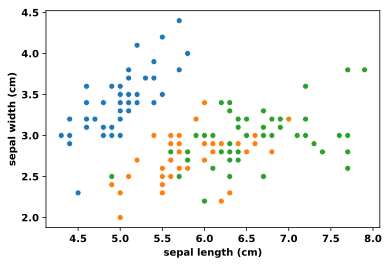

In [5]:
sns.scatterplot(
    data=iris_data,
    x="sepal length (cm)",
    y="sepal width (cm)",
    hue="species"
)

plt.legend().remove()

Standard matplotlib style looks awful though...

In [6]:
sns.set_style("ticks")

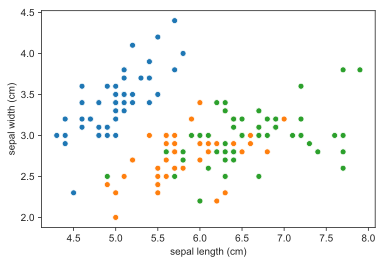

In [7]:
sns.scatterplot(
    data=iris_data,
    x="sepal length (cm)",
    y="sepal width (cm)",
    hue="species"
)

plt.legend().remove()

...way better 😎

#### Boxplot
Docs: https://seaborn.pydata.org/generated/seaborn.boxplot.html

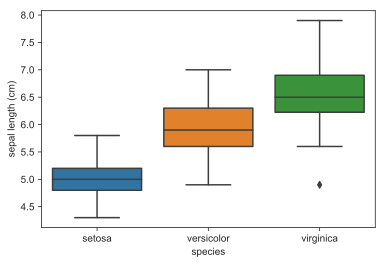

In [8]:
sns.boxplot(
    data=iris_data,
    x="species",
    y="sepal length (cm)"
)

#### Histogram (with kde curve)
Docs: https://seaborn.pydata.org/generated/seaborn.distplot.html

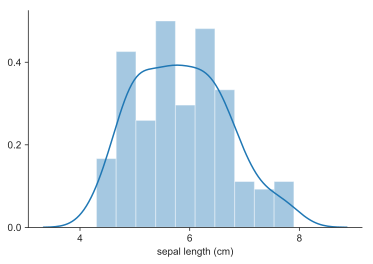

In [9]:
sns.distplot(
    iris_data["sepal length (cm)"],
    bins=10
)

sns.despine() # Removes black borders on top and right
plt.locator_params(nbins=4) # Reduces number of x/y ticks

#### Standard pyplot histogram

(array([ 9., 23., 14., 27., 16., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <a list of 10 Patch objects>)

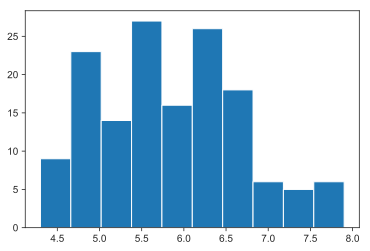

In [10]:
plt.hist(iris_data["sepal length (cm)"], bins=10)

#### Barplot
Docs: https://seaborn.pydata.org/generated/seaborn.barplot.html

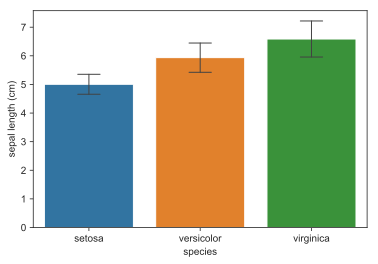

In [11]:
sns.barplot(
    data=iris_data,
    x="species",
    y="sepal length (cm)",
    capsize=.2,
    errwidth=1,
    ci="sd" # use standard dev. for confidence intervals
)

#### Line plot (this particular one makes absolutely no sense)
Docs: https://seaborn.pydata.org/generated/seaborn.lineplot.html

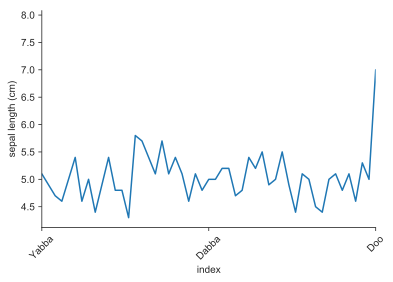

In [12]:
sns.lineplot(
    data=iris_data.reset_index(),
    x="index",
    y="sepal length (cm)"
)

plt.xlim((0, 50)) # Set the x axis' limits
plt.xticks((0, 25, 50), ["Yabba", "Dabba", "Doo"], rotation=45) # Modify x axis ticks

sns.despine()

plt.show() # To get rid of those output lines that look awful and just show the plot
# instead you can also plt.savefig("C:/path/to/plot.png", dpi=500) # Save plot somewhere, dpi=500 ensures decent plot quality

### Facetting
Sometimes you have more dimensions in your data than x/y axis, size and color may represent. If one of your dimensions is categorical you can split the plots into separate ones using a FacetGrid.  
Docs: https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

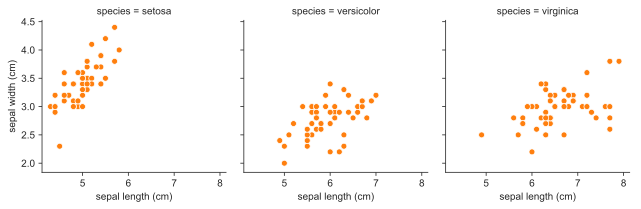

In [13]:
g = sns.FacetGrid(
    data=iris_data,
    col="species",
    col_wrap=3 # Only three plots per row, otherwise you can pass row="other_column" to also do facetting using another variable
)

g.map(
    sns.scatterplot,
    "sepal length (cm)",
    "sepal width (cm)",
    color="C1"
)